# Regression Models for Concurrence 

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout


2023-10-25 08:13:01.331004: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load and Split the Dataset

In [3]:
#df = pd.read_csv('drive/MyDrive/Colab Notebooks/ConcTut/data/states_reg.csv')
df = pd.read_csv('data/states_reg.csv')

In [4]:
df.head()

,a1,a2,b1,b2,c1,c2,d1,d2,conc
0,-0.724972,0.320269,-0.135307,0.082984,0.186696,0.424440,-0.040416,0.360571,0.467654
1,-0.280007,0.143554,-0.229086,-0.553389,0.181314,0.327491,-0.317852,-0.548738,0.569541
2,0.064944,0.086093,-0.778567,-0.227820,-0.015465,-0.442691,-0.220054,0.292684,0.703203
3,0.535995,0.391060,-0.088476,-0.657346,0.215823,-0.018545,-0.251141,0.099268,0.342187
4,-0.089208,-0.037614,0.039009,0.440877,0.398912,-0.570540,-0.043359,-0.555163,0.604046


In [5]:
X = df.iloc[:,0:8].values
y = df['conc'].values

print("There are",X.shape[0],"points in total.")

There are 2000 points in total.


In [6]:
# split the dataset into a training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print("There are",X_train.shape[0],"training points with",X.shape[1],"features each.")
print("There are",X_test.shape[0],"training points with",X.shape[1],"features each.")


There are 1600 training points with 8 features each.
There are 400 training points with 8 features each.


## Functions to Evaluate our Model

In [8]:
# plot the predicted concurrence vs real concurrence
def plot_predictions(y_pred):
    plt.figure(figsize=(9,9))
    plt.rcParams.update({'font.size': 24})
    plt.scatter(y_test, y_pred, s=150, marker='o', color='g')
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='blue', linewidth=2)
    plt.xlabel('Real Concurrence')
    plt.ylabel('Predicted Concurrence')
    plt.show()

In [9]:
# calculate metrics to evaluate the regression model 
def evaluate_model(y_pred):
    absolute_err = abs(y_pred - y_test)
    mean_absolute_err = np.mean(absolute_err)
    mean_absolute_percentage_err = 100 * (absolute_err / y_test)
    accuracy = 100 - np.mean(mean_absolute_percentage_err)
    mean_squared_err = mean_squared_error(y_test, y_pred)
    variance_score = r2_score(y_test, y_pred)

    measures = {'Mean Absolute Error:':np.round(mean_absolute_err,4), "Accuracy:":np.round(accuracy,4), 
                "Mean Squared Error:":np.round(mean_squared_err,4),"Variance Score:":np.round(variance_score,4)}

    for i in measures:
        print(i,measures[i])


## Prediction with Linear Regression Model

In [10]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training set
regr.fit(X_train, y_train)

LinearRegression()

In [11]:
# perform predictions on the test set 
y_pred = regr.predict(X_test)

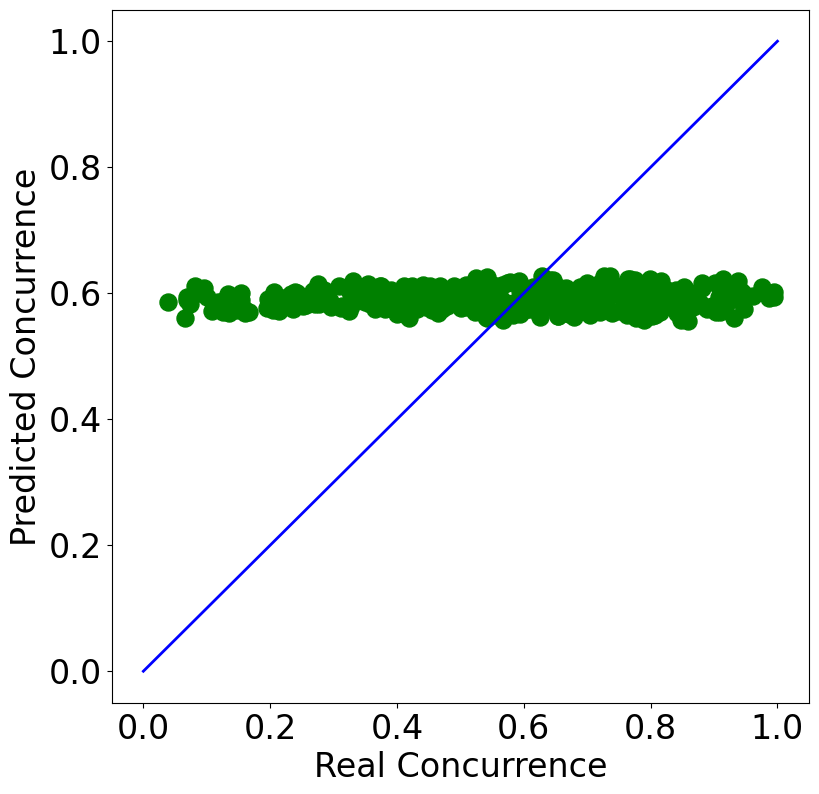

In [12]:
plot_predictions(y_pred)

## Prediction with Random Forest 

In [13]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [14]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

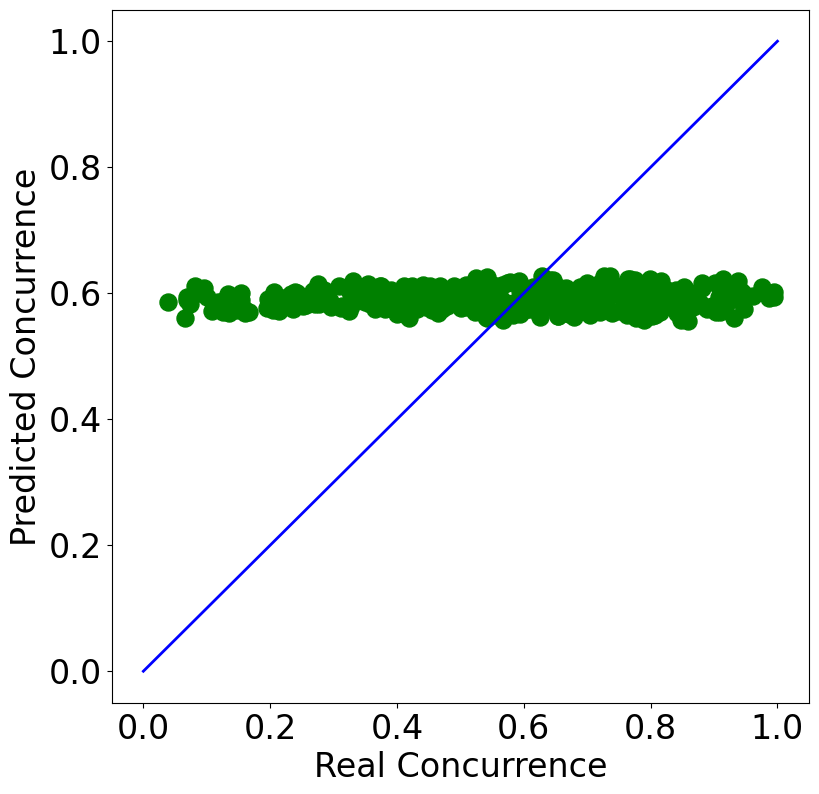

In [15]:
plot_predictions(y_pred)

In [16]:
evaluate_model(y_pred)

Mean Absolute Error: 0.1964
Accuracy: 34.6629
Mean Squared Error: 0.0542
Variance Score: 0.0032


## Prediction with Support Vector Regression

### Support Vector Regression with RBF Kernel

In [17]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_pred_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)

In [18]:
svr_lin = SVR(kernel='linear', C=1e3)
y_pred_lin = svr_lin.fit(X_train, y_train).predict(X_test)

In [19]:
svr_poly = SVR(kernel='poly', C=1e3, degree=3)
y_pred_poly = svr_poly.fit(X_train, y_train).predict(X_test)

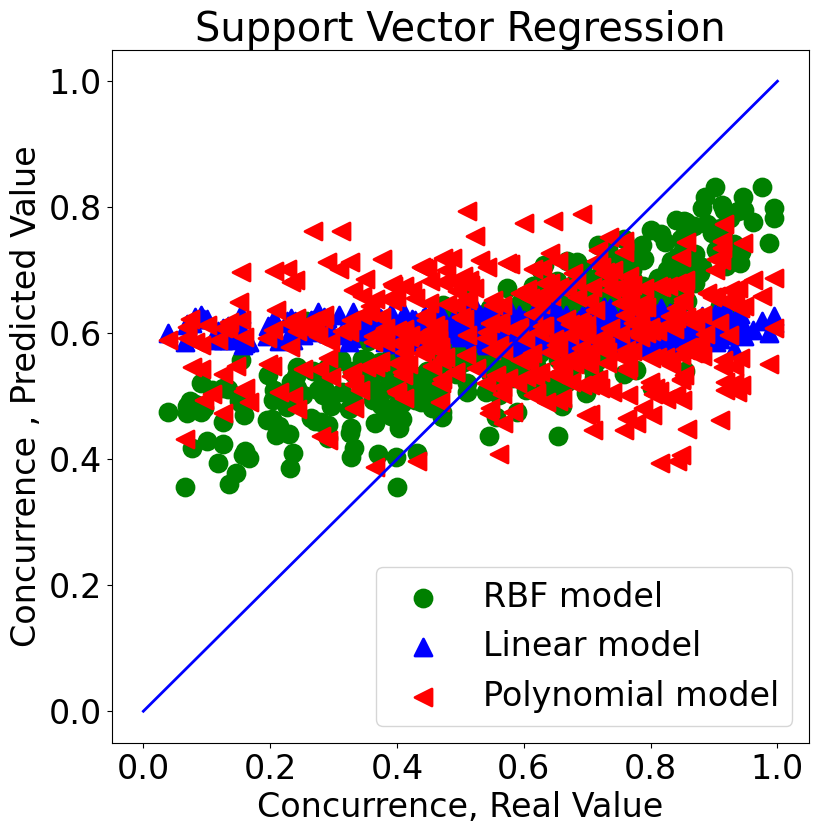

In [20]:
# Look at the results
#s=150, marker='o', color='g'
lw = 2
plt.figure(figsize=(9,9))
plt.rcParams.update({'font.size': 24})
plt.scatter(y_test, y_pred_rbf, lw=lw, label='RBF model',s=150, marker='o', color='g')
plt.scatter(y_test, y_pred_lin, lw=lw, label='Linear model',s=150, marker='^', color='b')
plt.scatter(y_test, y_pred_poly, lw=lw, label='Polynomial model',s=150, marker='<', color='r')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='blue', linewidth=2)
plt.xlabel('Concurrence, Real Value')
plt.ylabel('Concurrence , Predicted Value')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## Prediction with Neural Networks

### Neural Network 1: 3 layers, using Mean Squared Error Loss Function

In [21]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(16, activation = 'relu', input_dim = 8))

# Adding the second hidden layer
model.add(Dense(units = 8, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
# Fitting the ANN to the Training set
# Perform backpropagation algorithm in groups of 10
# Batch size = Number of samples used to train the network at a time
# Epoch = Number of times you go through the sample 
model.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
160/160 [==============================] - 1s 992us/step - loss: 0.1246
Epoch 2/20
160/160 [==============================] - 0s 912us/step - loss: 0.0599
Epoch 3/20
160/160 [==============================] - 0s 864us/step - loss: 0.0547
Epoch 4/20
160/160 [==============================] - 0s 840us/step - loss: 0.0520
Epoch 5/20
160/160 [==============================] - 0s 893us/step - loss: 0.0506
Epoch 6/20
160/160 [==============================] - 0s 839us/step - loss: 0.0493
Epoch 7/20
160/160 [==============================] - 0s 859us/step - loss: 0.0488
Epoch 8/20
160/160 [==============================] - 0s 885us/step - loss: 0.0481
Epoch 9/20
160/160 [==============================] - 0s 866us/step - loss: 0.0478
Epoch 10/20
160/160 [==============================] - 0s 877us/step - loss: 0.0473
Epoch 11/20
160/160 [==============================] - 0s 837us/step - loss: 0.0471
Epoch 12/20
160/160 [==============================] - 0s 878us/step - loss: 0.0467
E

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
y_NN = model.predict(X_test)

13/13 [==============================] - 0s 900us/step


In [25]:
evaluate_model(y_NN)

Mean Absolute Error: 0.2017
Accuracy: 34.6998
Mean Squared Error: 0.0518
Variance Score: 0.0466


### Neural Network 2: 5 Layers, More Nodes in Each Layer

In [26]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(16, activation = 'relu', input_dim = 8))

# Adding the second hidden layer
model.add(Dense(units = 20, activation = 'relu'))

# Adding the second hidden layer
model.add(Dense(units = 20, activation = 'relu'))

# Adding the second hidden layer
model.add(Dense(units = 8, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 200)

Epoch 1/200
160/160 [==============================] - 1s 1ms/step - loss: 0.1609
Epoch 2/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0523
Epoch 3/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0505
Epoch 4/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0496
Epoch 5/200
160/160 [==============================] - 0s 985us/step - loss: 0.0489
Epoch 6/200
160/160 [==============================] - 0s 973us/step - loss: 0.0482
Epoch 7/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0474
Epoch 8/200
160/160 [==============================] - 0s 984us/step - loss: 0.0467
Epoch 9/200
160/160 [==============================] - 0s 982us/step - loss: 0.0467
Epoch 10/200
160/160 [==============================] - 0s 978us/step - loss: 0.0454
Epoch 11/200
160/160 [==============================] - 0s 983us/step - loss: 0.0448
Epoch 12/200
160/160 [==============================] - 0s 990us/step - loss: 0.0447

160/160 [==============================] - 0s 963us/step - loss: 0.0225
Epoch 98/200
160/160 [==============================] - 0s 967us/step - loss: 0.0225
Epoch 99/200
160/160 [==============================] - 0s 994us/step - loss: 0.0218
Epoch 100/200
160/160 [==============================] - 0s 990us/step - loss: 0.0222
Epoch 101/200
160/160 [==============================] - 0s 948us/step - loss: 0.0218
Epoch 102/200
160/160 [==============================] - 0s 957us/step - loss: 0.0215
Epoch 103/200
160/160 [==============================] - 0s 966us/step - loss: 0.0221
Epoch 104/200
160/160 [==============================] - 0s 977us/step - loss: 0.0212
Epoch 105/200
160/160 [==============================] - 0s 990us/step - loss: 0.0216
Epoch 106/200
160/160 [==============================] - 0s 945us/step - loss: 0.0218
Epoch 107/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 108/200
160/160 [==============================] - 0s 958us/step -

160/160 [==============================] - 0s 969us/step - loss: 0.0163
Epoch 193/200
160/160 [==============================] - 0s 984us/step - loss: 0.0163
Epoch 194/200
160/160 [==============================] - 0s 987us/step - loss: 0.0165
Epoch 195/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 196/200
160/160 [==============================] - 0s 960us/step - loss: 0.0163
Epoch 197/200
160/160 [==============================] - 0s 974us/step - loss: 0.0158
Epoch 198/200
160/160 [==============================] - 0s 971us/step - loss: 0.0166
Epoch 199/200
160/160 [==============================] - 0s 987us/step - loss: 0.0162
Epoch 200/200
160/160 [==============================] - 0s 970us/step - loss: 0.0163


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 20)                340       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 8)                 168       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1081 (4.22 KB)
Trainable params: 1081 (4.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
y_NN = model.predict(X_test).reshape(y_NN.shape[0],)

13/13 [==============================] - 0s 946us/step


In [30]:
evaluate_model(y_NN)

Mean Absolute Error: 0.1846
Accuracy: 44.4168
Mean Squared Error: 0.0534
Variance Score: 0.0179


### Neural Network 3: 6 Layers, More Nodes in Each Layer

In [31]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(16, activation = 'relu', input_dim = 8))

# Adding the second hidden layer
model.add(Dense(units = 100, activation = 'relu'))

# Adding the second hidden layer
model.add(Dense(units = 100, activation = 'relu'))

# Adding the second hidden layer
model.add(Dense(units = 100, activation = 'relu'))

# Adding the second hidden layer
model.add(Dense(units = 8, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 200)

Epoch 1/200
160/160 [==============================] - 1s 1ms/step - loss: 0.0744
Epoch 2/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0520
Epoch 3/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0507
Epoch 4/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0483
Epoch 5/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0467
Epoch 6/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0448
Epoch 7/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0407
Epoch 8/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 9/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 10/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 11/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 12/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 13/200


160/160 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 100/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 101/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 102/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 103/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 104/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 105/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 106/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 107/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 108/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 109/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 110/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 

160/160 [==============================] - 0s 1ms/step - loss: 5.4064e-04
Epoch 195/200
160/160 [==============================] - 0s 1ms/step - loss: 8.6946e-04
Epoch 196/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 197/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 198/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 199/200
160/160 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 200/200
160/160 [==============================] - 0s 1ms/step - loss: 5.9059e-04


In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                144       
                                                                 
 dense_9 (Dense)             (None, 100)               1700      
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 8)                 808       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 22861 (89.30 KB)
Trainable params: 22861

In [34]:
y_NN = model.predict(X_test).reshape(y_NN.shape[0],)

13/13 [==============================] - 0s 982us/step


In [35]:
evaluate_model(y_NN)

Mean Absolute Error: 0.1352
Accuracy: 60.1257
Mean Squared Error: 0.031
Variance Score: 0.4296


### Neural Network 4: 6 Layers, More Nodes, with Batch Normalisation and Dropout

In [36]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(16, activation = 'relu', input_dim = 8))
model.add(BatchNormalization())
# Adding the second hidden layer
model.add(Dense(units = 200))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
# Adding the second hidden layer
model.add(Dense(units = 300))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
# Adding the second hidden layer
model.add(Dense(units = 200))
model.add(Activation('relu'))
model.add(Dropout(0.3))
# Adding the second hidden layer
model.add(Dense(units = 8, activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 20, epochs = 200)

Epoch 1/200
80/80 [==============================] - 1s 2ms/step - loss: 0.1569
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0822
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0688
Epoch 4/200
80/80 [==============================] - 0s 3ms/step - loss: 0.0641
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 8/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 10/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 11/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 12/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 13/200
80/80 [=================

80/80 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 103/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 104/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 105/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 106/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 107/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 108/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 109/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 110/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 111/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 112/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 113/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 114/200
80/80 [=========

In [38]:
y_NN = model.predict(X_test).reshape(y_NN.shape[0],)

13/13 [==============================] - 0s 1ms/step


In [39]:
evaluate_model(y_NN)

Mean Absolute Error: 0.1207
Accuracy: 59.6382
Mean Squared Error: 0.0235
Variance Score: 0.567
